# **I. Importing data**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhbadole/bank-customer-churn-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/saurabhbadole/bank-customer-churn-prediction-dataset/versions/2


In [52]:
df = pd.read_csv(path + "/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **II. About The Dataset**


## **Description:**

This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

## **Features:**

**RowNumber:** The sequential number assigned to each row in the dataset.

**CustomerId:** A unique identifier for each customer.

**Surname:** The surname of the customer.

**CreditScore:** The credit score of the customer.

**Geography:** The geographical location of the customer (e.g., country or region).

**Gender:** The gender of the customer.

**Age:** The age of the customer.

**Tenure:** The number of years the customer has been with the bank.

**Balance:** The account balance of the customer.

**NumOfProducts:** The number of bank products the customer has.

**HasCrCard:** Indicates whether the customer has a credit card (binary: yes/no).

**IsActiveMember:** Indicates whether the customer is an active member (binary: yes/no).

**EstimatedSalary:** The estimated salary of the customer.

**Exited:** Indicates whether the customer has exited the bank (binary: yes/no).

## **Usage:**

This dataset can be used for exploratory data analysis to understand the factors influencing customer churn in banks.
It can also be used to build machine learning models for predicting customer churn based on the given features.

# **III. Exploring Data Analysis (EDA)**

## **1. Check missing values and Dropping unnecessary columns**

### **1.1 Basic column information**

In [4]:
def basic_info(data):
    # Creates a DataFrame containing basic information about each column in the input DataFrame 'data'.
    data_basic = pd.DataFrame({
        "dtype": data.dtypes,         # Gets the data type of each column
        "instances": data.count(),     # Counts the number of non-null instances in each column
        "unique": data.nunique()       # Counts the number of unique values in each column
    })
    return data_basic

# Calls the basic_info function on the DataFrame 'df' and prints the result.
print(basic_info(df))


                   dtype  instances  unique
RowNumber          int64      10000   10000
CustomerId         int64      10000   10000
Surname           object      10000    2932
CreditScore        int64      10000     460
Geography         object      10000       3
Gender            object      10000       2
Age                int64      10000      70
Tenure             int64      10000      11
Balance          float64      10000    6382
NumOfProducts      int64      10000       4
HasCrCard          int64      10000       2
IsActiveMember     int64      10000       2
EstimatedSalary  float64      10000    9999
Exited             int64      10000       2


### **1.2 Missing and duplicate data information**

In [5]:
def missing_and_duplicates_info(data):
    # Creates a DataFrame containing information on missing values and duplicate entries for each column in 'data'.
    data_missing_duplicates = pd.DataFrame({
        "sum_null": data.isnull().sum(),           # Calculates the total number of null (missing) values in each column
        "duplicates": data.count() - data.nunique() # Calculates the number of duplicate entries by subtracting the number of unique values from the count of non-null values
    })
    return data_missing_duplicates

# Calls the missing_and_duplicates_info function on the DataFrame 'df' and prints the result.
print(missing_and_duplicates_info(df))


                 sum_null  duplicates
RowNumber               0           0
CustomerId              0           0
Surname                 0        7068
CreditScore             0        9540
Geography               0        9997
Gender                  0        9998
Age                     0        9930
Tenure                  0        9989
Balance                 0        3618
NumOfProducts           0        9996
HasCrCard               0        9998
IsActiveMember          0        9998
EstimatedSalary         0           1
Exited                  0        9998


**Conclusion : Data is cleaned and have no missing value.**

## **2. Basic data discovery**


In [6]:
df.columns
# is used to retrieve the list of column names in the DataFrame

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.describe()
# is used to generate summary statistics of the numerical columns in the DataFrame

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **3. Distribution and correlation between input variables.**

### **3.1. Descriptive input variables**

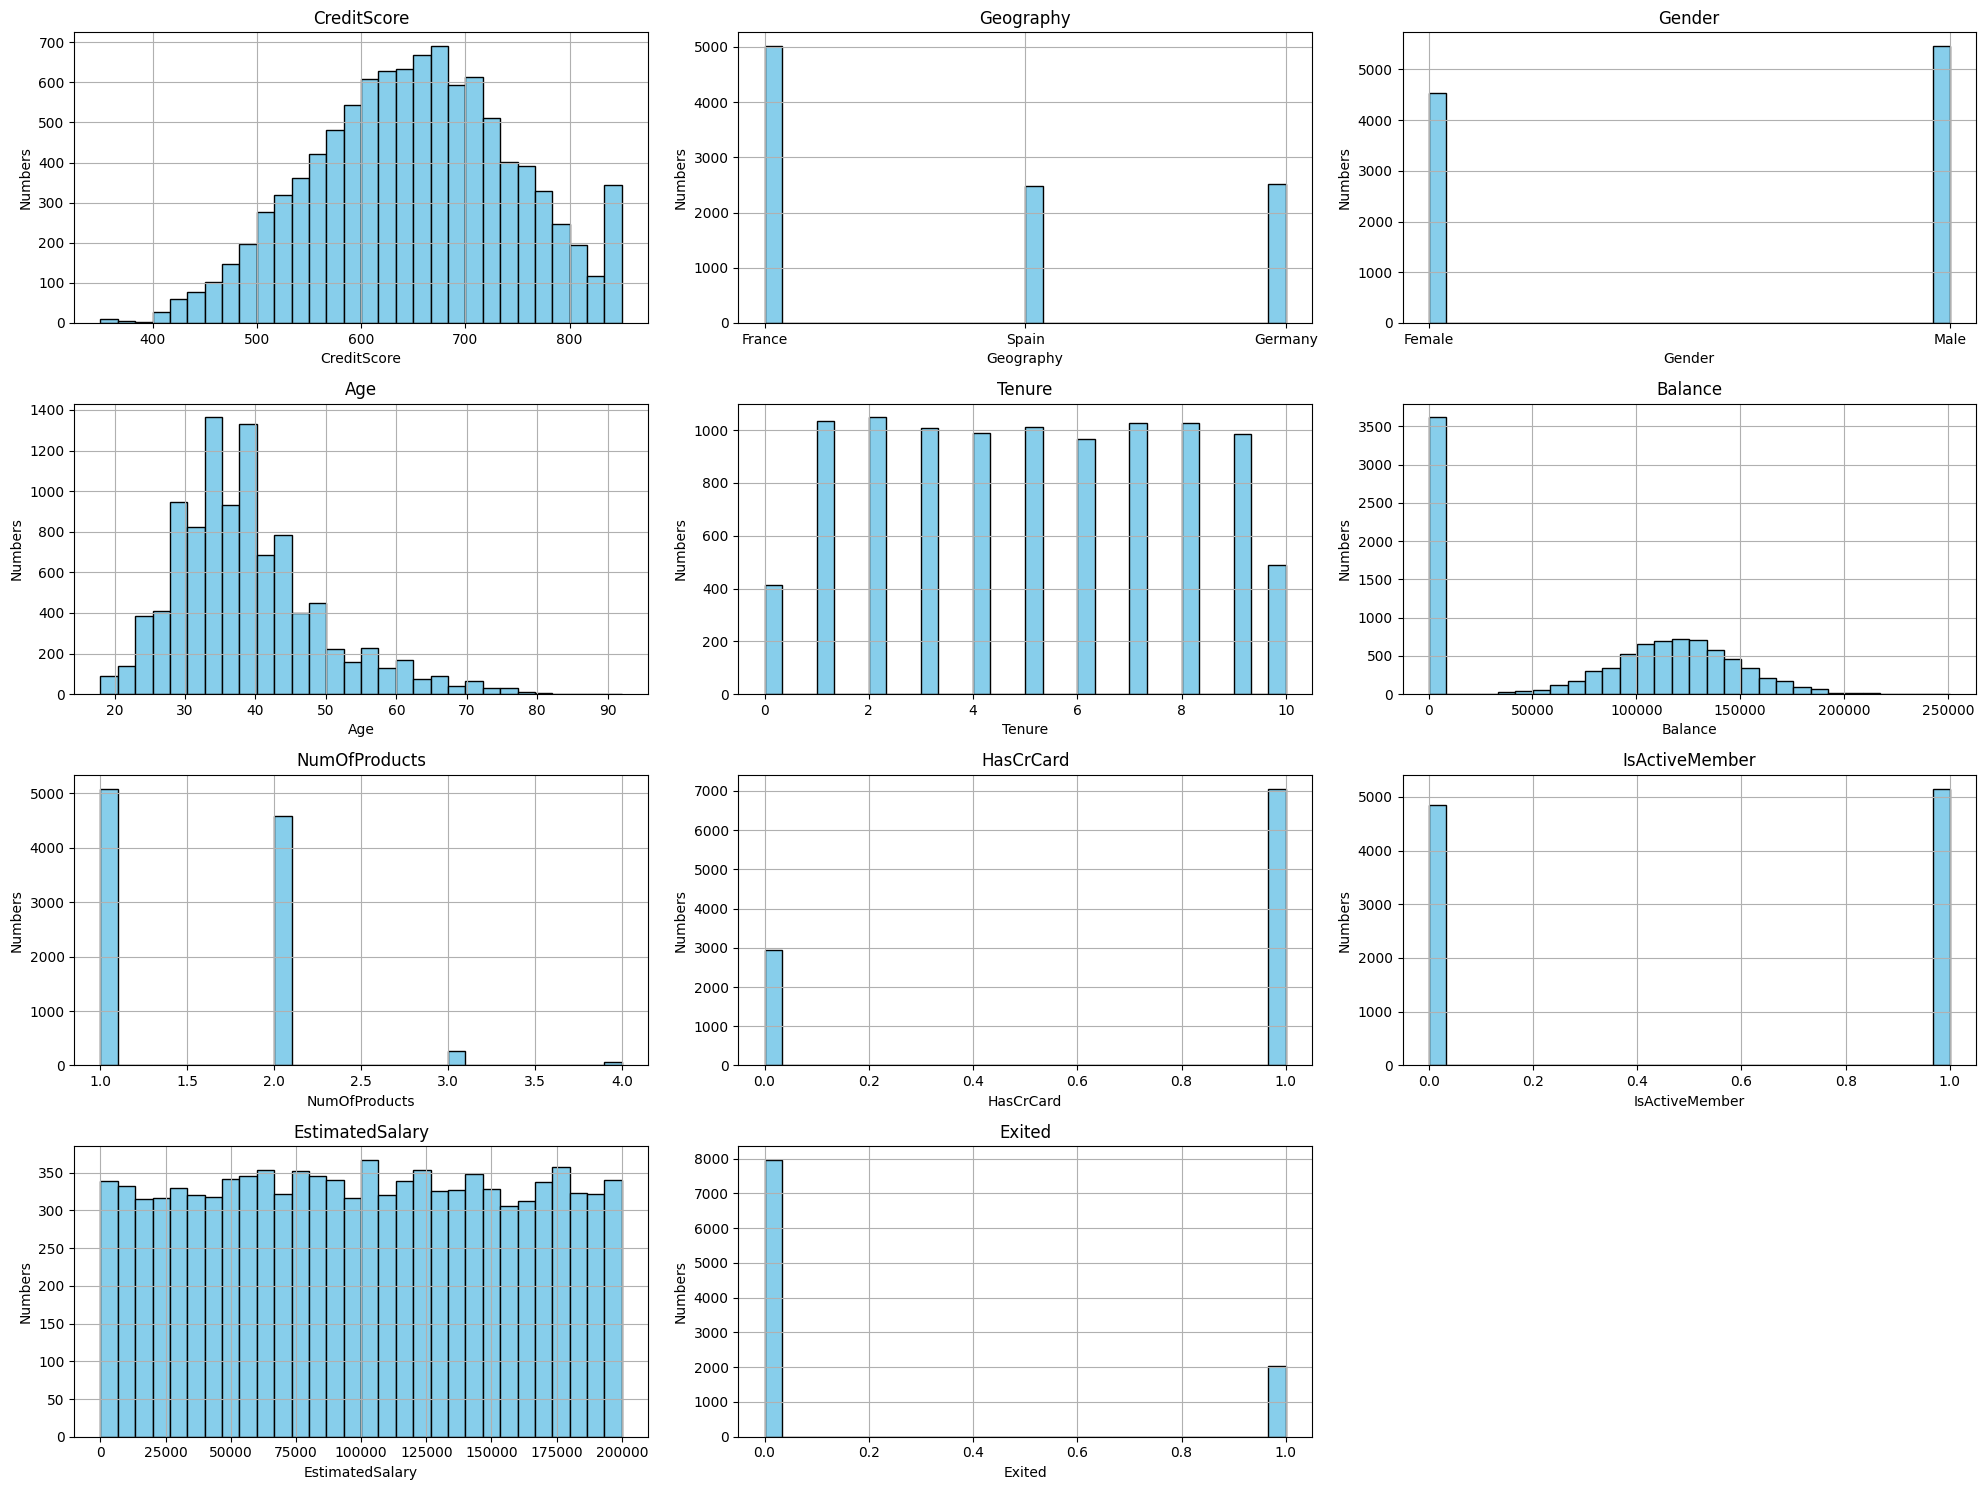

In [8]:
# Drop unnecessary columns (e.g., identifiers) to focus on necessary  data only
numeric_data = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Set the figure size for the plot grid
plt.figure(figsize=(20, 15))

# Loop through each column in the numeric data
for i, column in enumerate(numeric_data.columns, 1):
    # Create a subplot for each column, arranged in a 4x3 grid
    plt.subplot(4, 3, i)

    # Plot a histogram for the current column with 30 bins
    numeric_data[column].hist(bins=30, color='skyblue', edgecolor='black')

    # Set the title and labels for the current subplot
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Numbers')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


### **3.2 The average values of key variables between two gender groups.**

<ipython-input-9-80f8a3fa9496>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y=feature, data=df, ci=None)
<ipython-input-9-80f8a3fa9496>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y=feature, data=df, ci=None)
<ipython-input-9-80f8a3fa9496>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y=feature, data=df, ci=None)
<ipython-input-9-80f8a3fa9496>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y=feature, data=df, ci=None)
<ipython-input-9-80f8a3fa9496>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y=feature, data=df, ci=None)
<ipython-input-9-80f8a3fa9496>:15: FutureWarning: 

The `ci` parameter is deprecated.

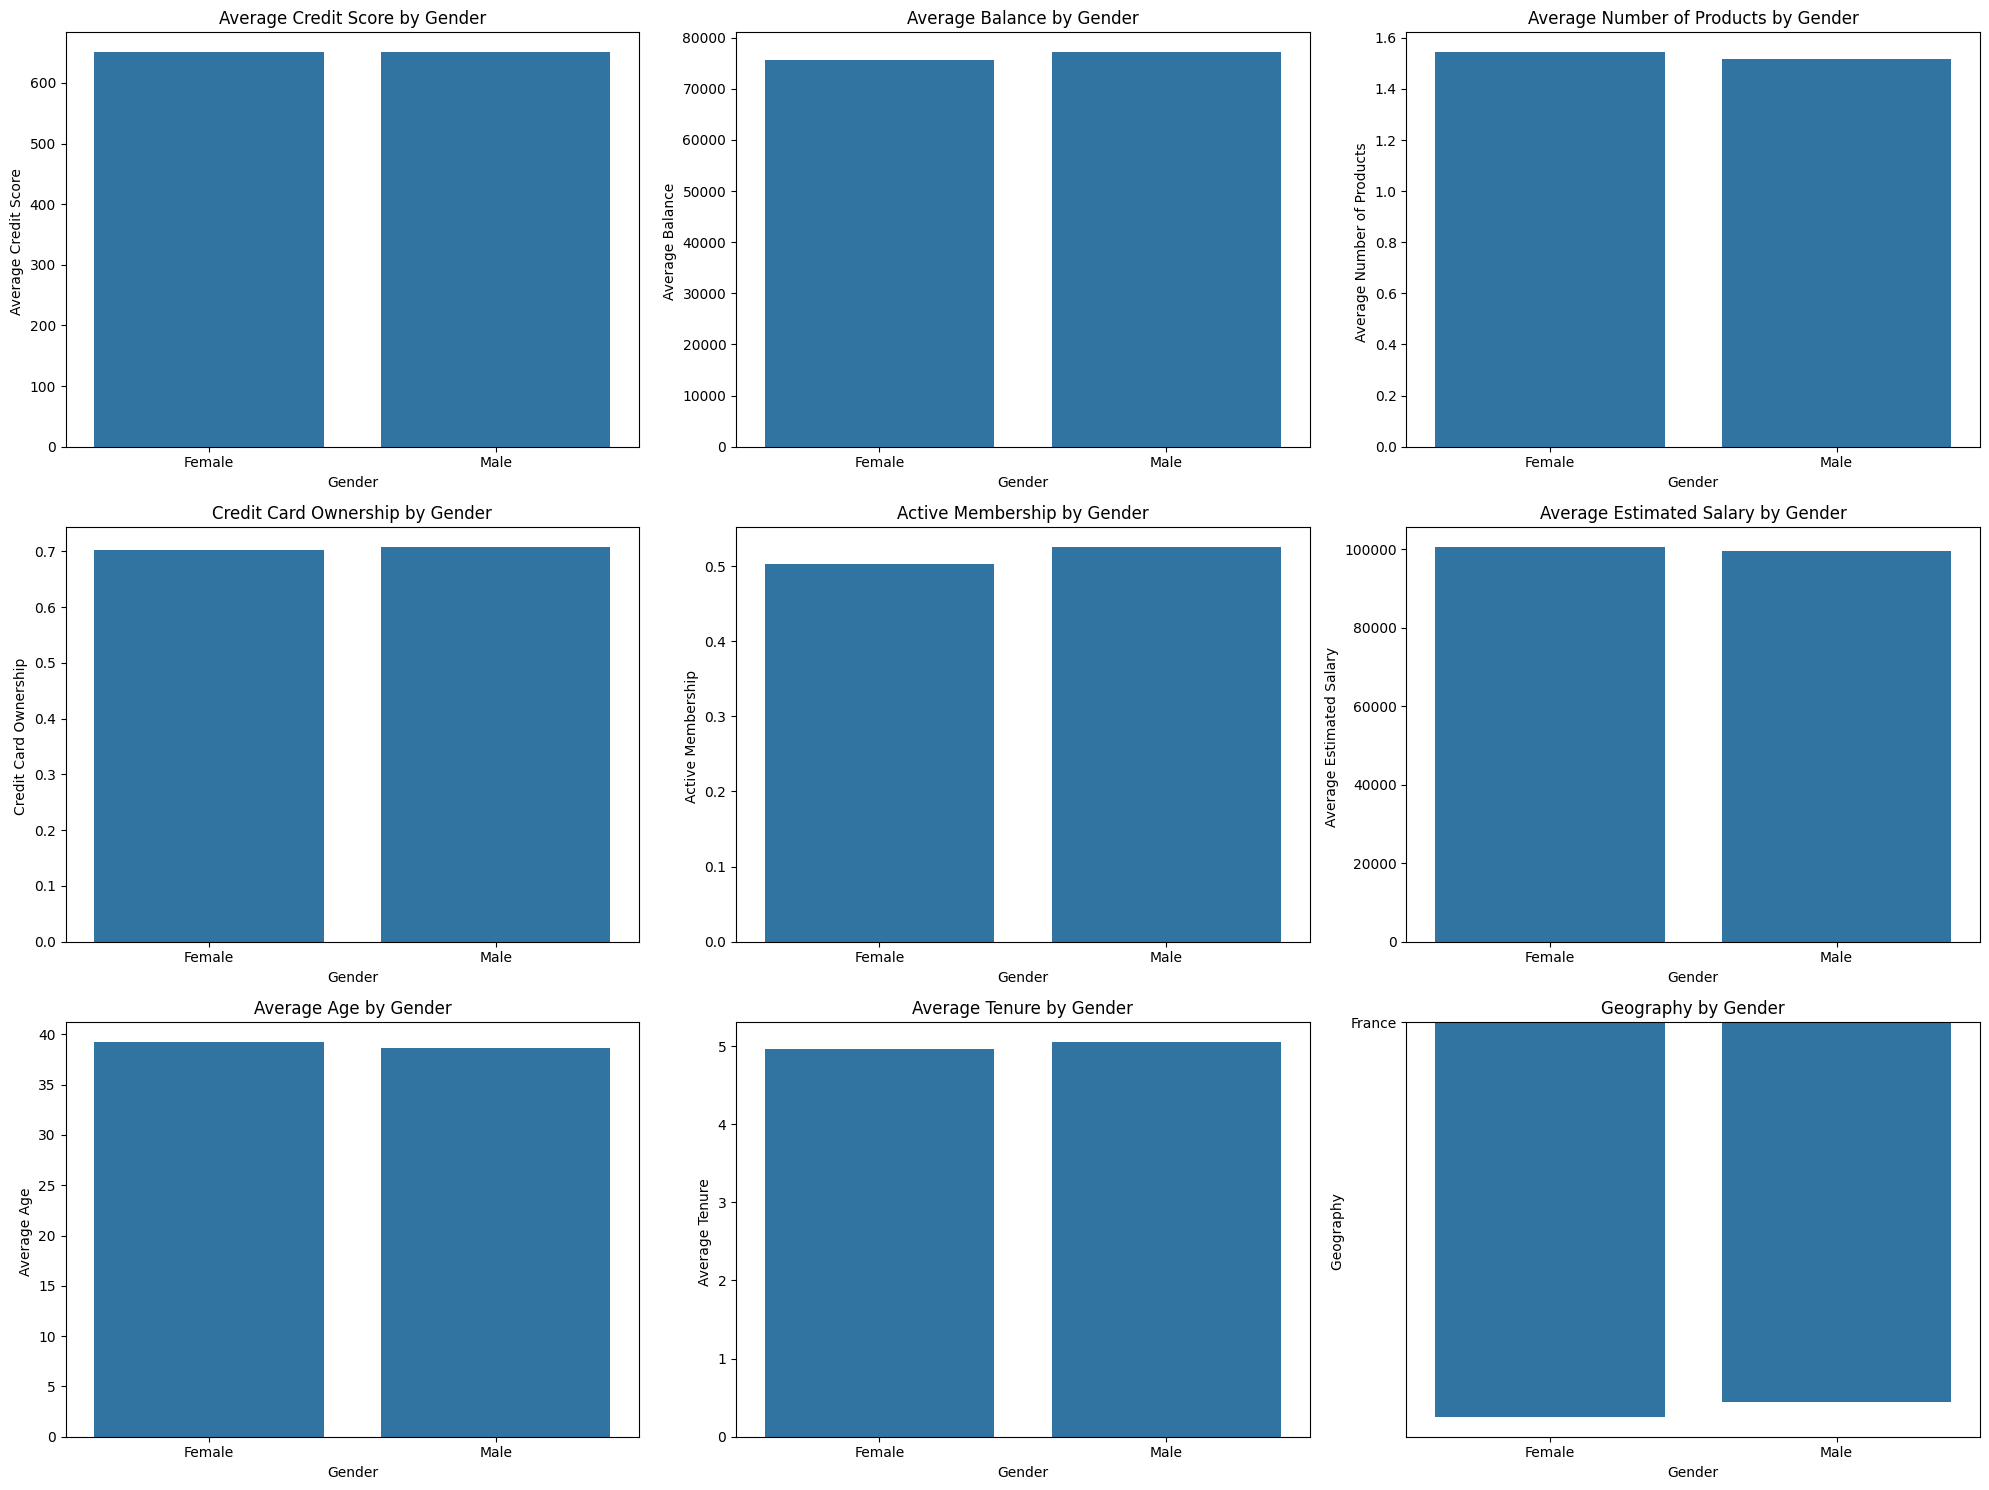

In [9]:
plt.figure(figsize=(20, 15))

# Define your features and titles
features = ['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age', 'Tenure', 'Geography']
titles = [
    'Average Credit Score by Gender', 'Average Balance by Gender',
    'Average Number of Products by Gender', 'Credit Card Ownership by Gender',
    'Active Membership by Gender', 'Average Estimated Salary by Gender',
    'Average Age by Gender', 'Average Tenure by Gender', 'Geography by Gender'
]

# Loop through features and plot each one
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust to 3 rows, 3 columns for 9 plots
    sns.barplot(x='Gender', y=feature, data=df, ci=None)
    plt.title(titles[i-1])
    plt.xlabel('Gender')
    plt.ylabel(titles[i-1].split('by')[0])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **3.3 The distributions and categorical breakdowns by geography**

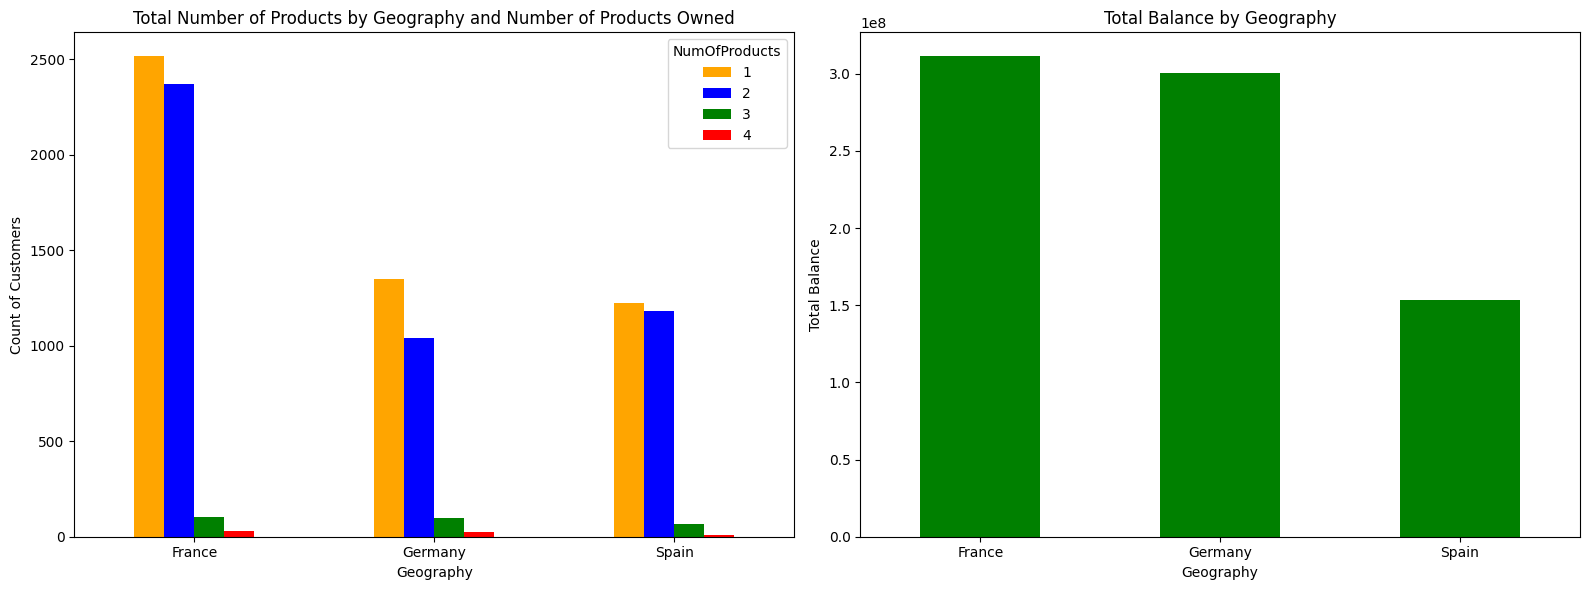

In [10]:
# Calculate the total Balance for each Geography
balance_by_geo = df.groupby('Geography')['Balance'].sum()

# Create a frequency table with Geography and NumOfProducts columns
product_by_country = df.groupby(['Geography', 'NumOfProducts']).size().unstack()

# Set the overall figure size for the entire plot
plt.figure(figsize=(16, 6))

# Plot the number of products owned by customers, grouped by Geography and NumOfProducts
plt.subplot(1, 2, 1)
product_by_country.plot(kind='bar', stacked=False, ax=plt.gca(), color=['orange', 'blue', 'green', 'red'])
plt.title('Total Number of Products by Geography and Number of Products Owned')
plt.xlabel('Geography')
plt.ylabel('Count of Customers')
plt.legend(title='NumOfProducts')
plt.xticks(rotation=0)

# Plot the total Balance by Geography
plt.subplot(1, 2, 2)
balance_by_geo.plot(kind='bar', color='green', ax=plt.gca())
plt.title('Total Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Balance')
plt.xticks(rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


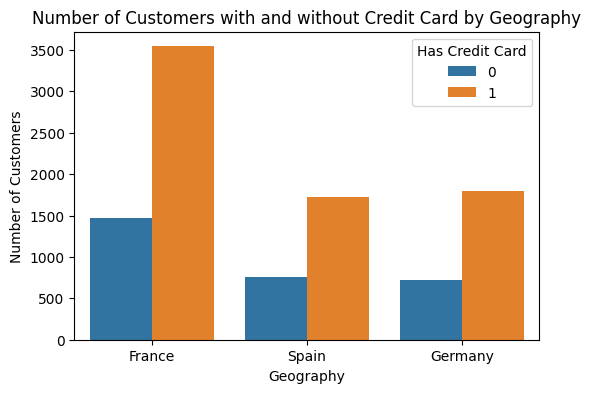

In [11]:
# Set the plot size
plt.figure(figsize=(6, 4))

# Create a count plot showing customers with and without a credit card by geography
sns.countplot(x='Geography', hue='HasCrCard', data=df)

# Add title and labels
plt.title('Number of Customers with and without Credit Card by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')

# Add a legend for credit card ownership
plt.legend(title='Has Credit Card')

# Display the plot
plt.show()


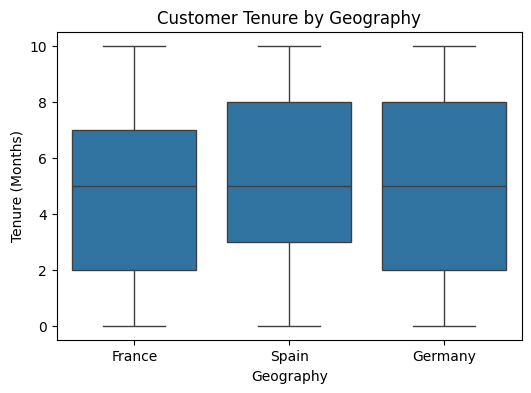

In [12]:
# Set the plot size
plt.figure(figsize=(6, 4))

# Create a boxplot to show customer tenure by geography
sns.boxplot(x='Geography', y='Tenure', data=df)

# Add title and axis labels
plt.title('Customer Tenure by Geography')
plt.xlabel('Geography')
plt.ylabel('Tenure (Months)')

# Display the plot
plt.show()


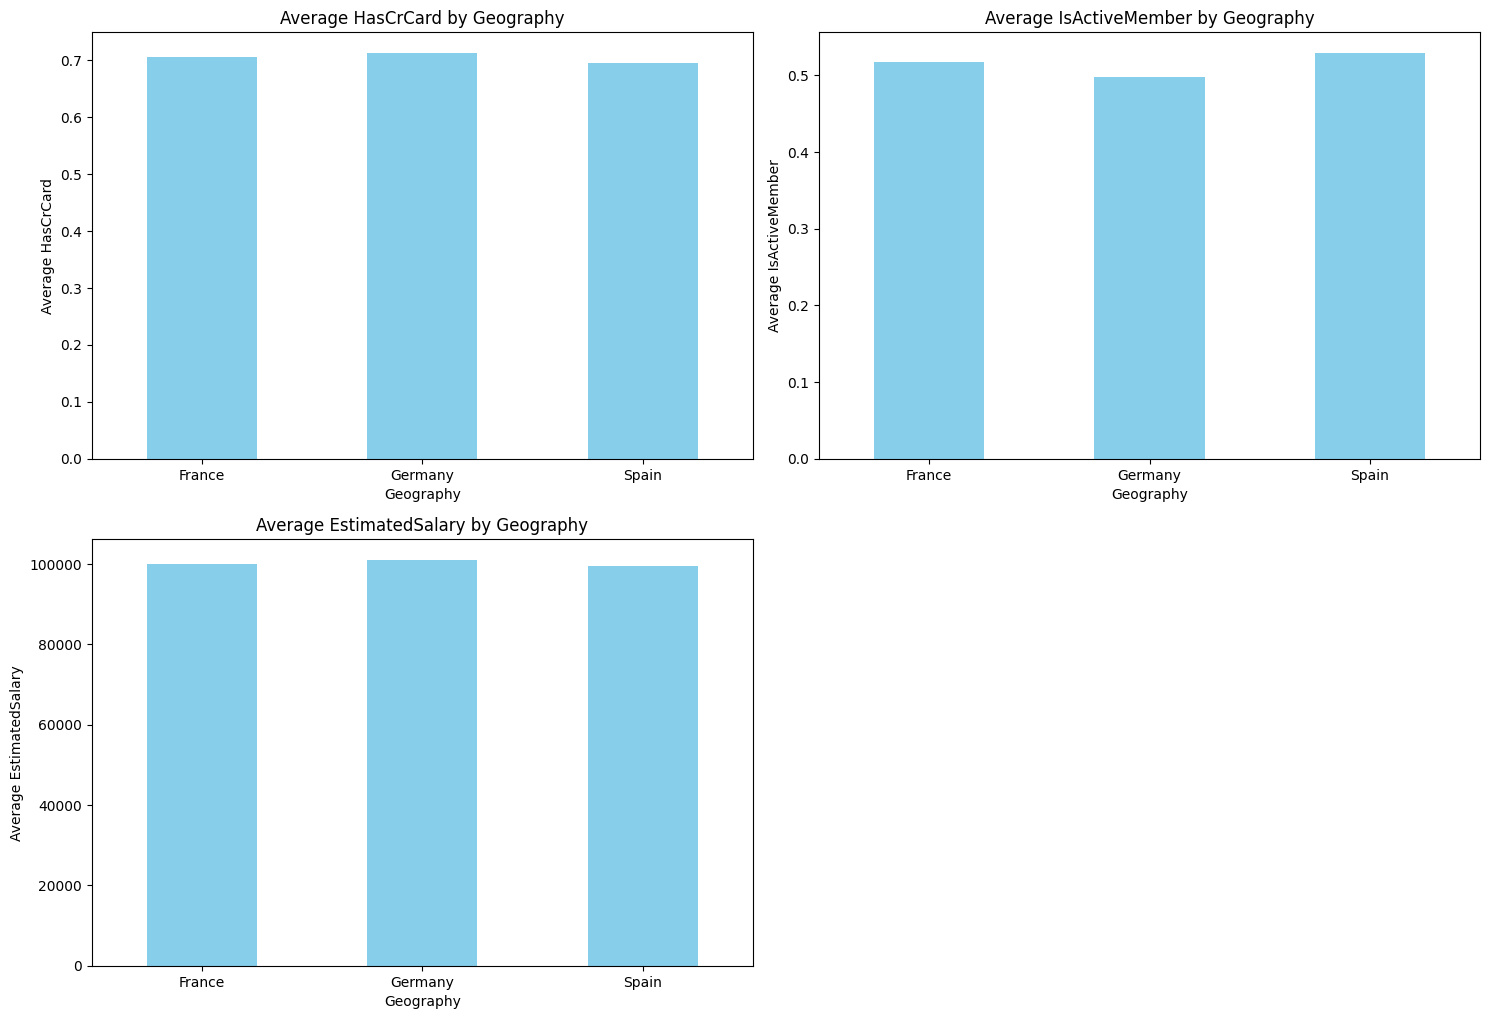

In [13]:
financial_variables = ['HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Set the overall figure size
plt.figure(figsize=(15, 20))

# Create bar plots for each financial variable by geography
for i, var in enumerate(financial_variables, 1):
    plt.subplot(4, 2, i)  # Create a subplot in a 4x2 grid
    # Calculate the average value of each financial variable by geography
    avg_by_geography = df.groupby('Geography')[var].mean()
    # Plot a bar chart of the average values by geography
    avg_by_geography.plot(kind='bar', color='skyblue', ax=plt.gca())
    plt.title(f'Average {var} by Geography')  # Title for each subplot
    plt.xlabel('Geography')
    plt.ylabel(f'Average {var}')
    plt.xticks(rotation=0)  # Set x-axis labels to horizontal

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


### **3.4. The distributions and categorical breakdowns by Balance**

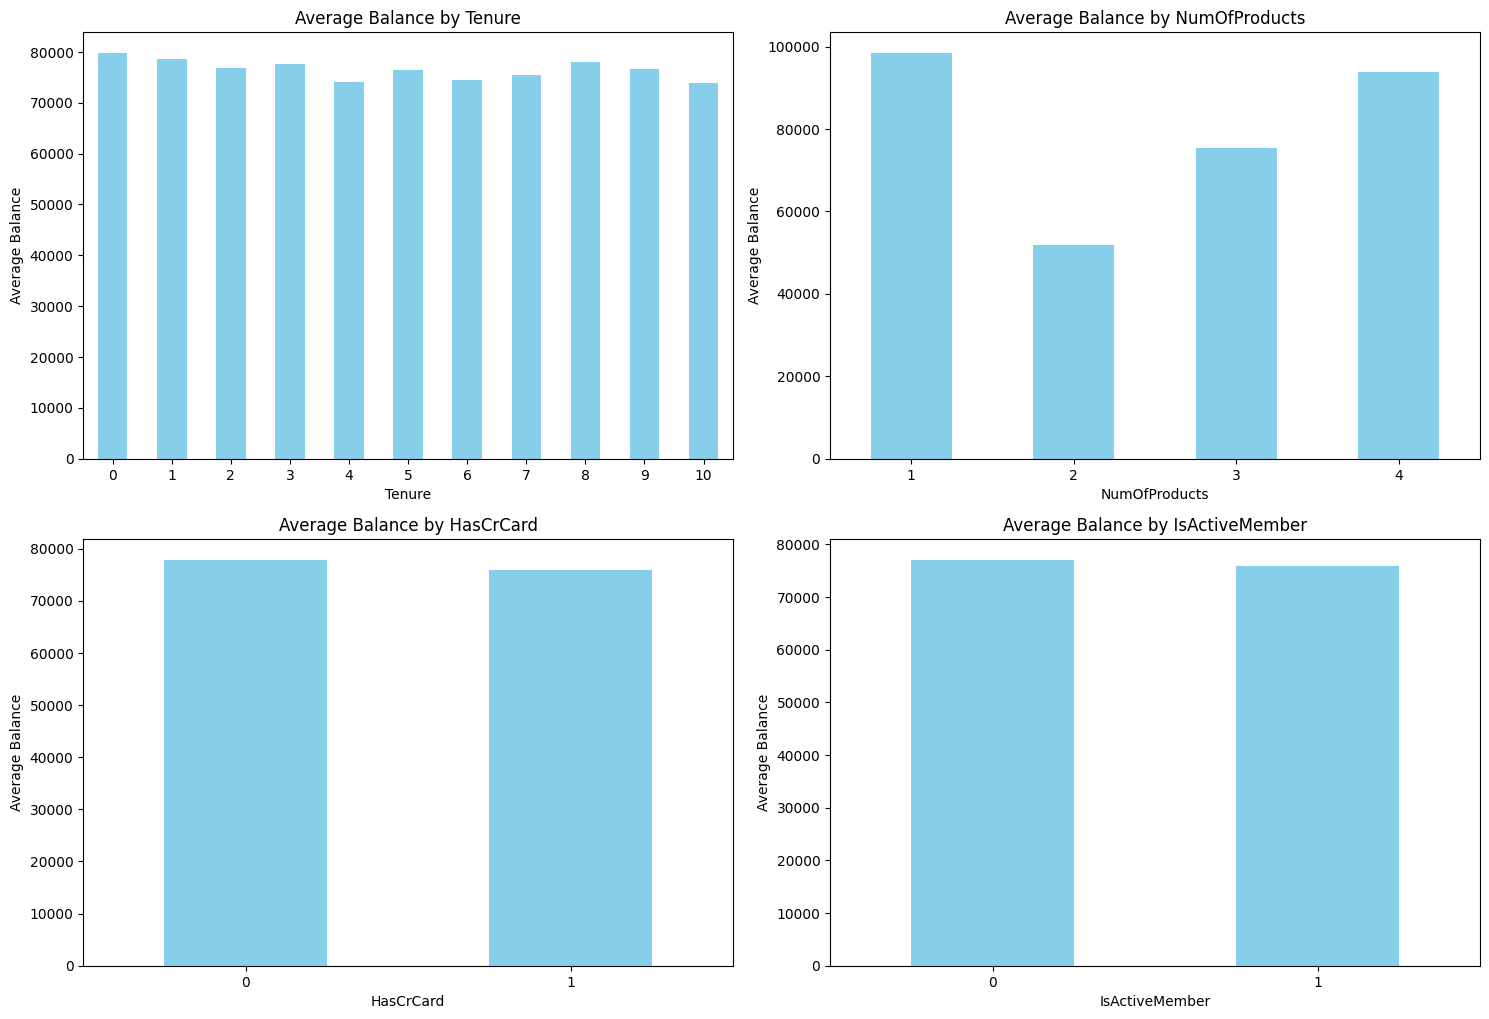

In [14]:
key_variables = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Set the overall figure size
plt.figure(figsize=(15, 20))

# Create bar plots for each key variable showing average balance
for i, var in enumerate(key_variables, 1):
    plt.subplot(4, 2, i)  # Create a subplot in a 4x2 grid
    # Calculate the average balance for each value of the key variable
    balance_by_var = df.groupby(var)['Balance'].mean()
    # Plot a bar chart of the average balance for each variable value
    balance_by_var.plot(kind='bar', color='skyblue', ax=plt.gca())
    plt.title(f'Average Balance by {var}')
    plt.xlabel(var)
    plt.ylabel('Average Balance')
    plt.xticks(rotation=0)

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


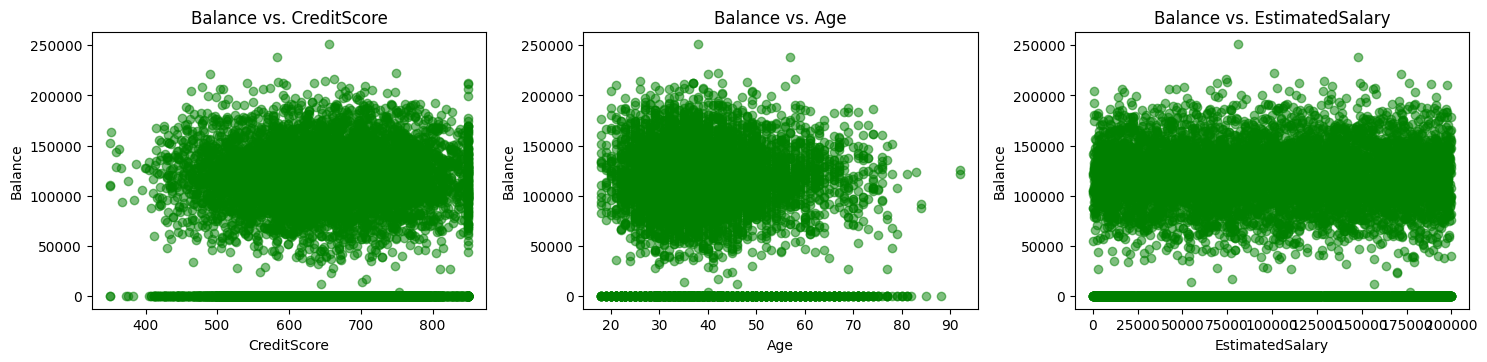

In [15]:
# Select important financial variables to compare with Balance
key_variables = ['CreditScore', 'Age', 'EstimatedSalary']

# Set the overall figure size
plt.figure(figsize=(15, 10))

# Create scatter plots for each variable against Balance
for i, var in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)  # Create a subplot in a 3x3 grid
    plt.scatter(df[var], df['Balance'], alpha=0.5, color='green')  # Scatter plot with transparency for clarity
    plt.title(f'Balance vs. {var}')
    plt.xlabel(var)
    plt.ylabel('Balance')

# Adjust layout to avoid overlapping and display the plots
plt.tight_layout()
plt.show()


### **3.5 Churn rate analysis**

<ipython-input-16-6cf479006a76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


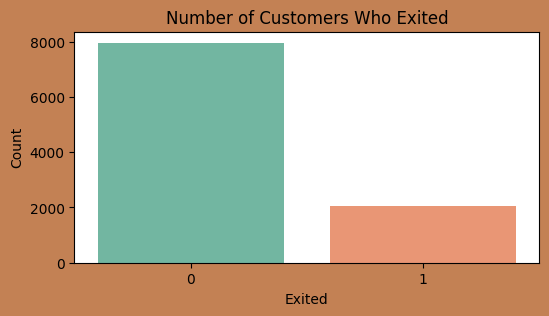

In [16]:
# Set the figure size and background color for the plot
plt.figure(figsize=(6, 3), facecolor="#C38154")

# Create a count plot to show the number of customers who exited (churned) or stayed
sns.countplot(x='Exited', data=df, palette='Set2')

# Add title and labels for clarity
plt.title('Number of Customers Who Exited')
plt.xlabel('Exited')  # Label for the x-axis (0 = stayed, 1 = exited)
plt.ylabel('Count')   # Label for the y-axis showing the count of customers

# Display the plot
plt.show()


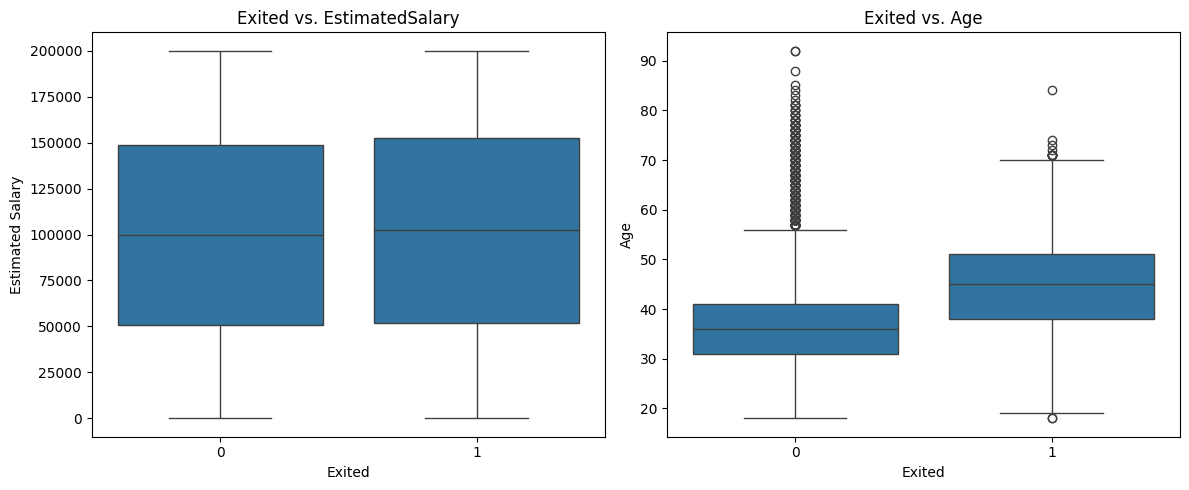

In [17]:
# Set the figure size for the two side-by-side plots
plt.figure(figsize=(12, 5))

# Box Plot for Exited vs. EstimatedSalary
plt.subplot(1, 2, 1)  # Set up the first subplot in a 1x2 grid
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')  # Create a box plot to show EstimatedSalary distribution by Exited status
plt.title('Exited vs. EstimatedSalary')
plt.xlabel('Exited')  # Label for the x-axis (0 = stayed, 1 = exited)
plt.ylabel('Estimated Salary')  # Label for the y-axis

# Box Plot for Exited vs. Age
plt.subplot(1, 2, 2)  # Set up the second subplot in a 1x2 grid
sns.boxplot(data=df, x='Exited', y='Age')  # Create a box plot to show Age distribution by Exited status
plt.title('Exited vs. Age')
plt.xlabel('Exited')  # Label for the x-axis
plt.ylabel('Age')  # Label for the y-axis

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


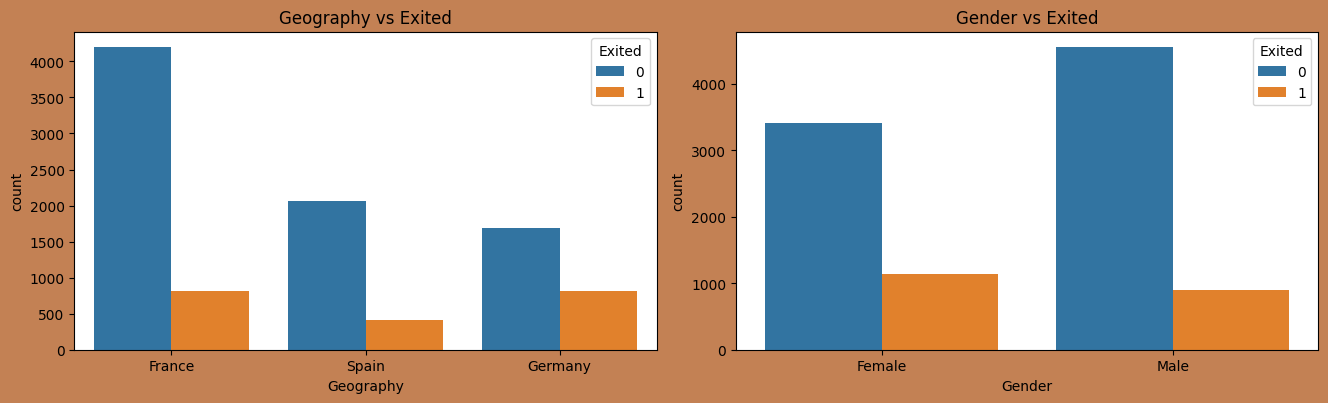

In [18]:
categorical_columns = ['Geography', 'Gender']

# Set the figure size and background color for the entire plot
plt.figure(figsize=(20, 15), facecolor="#C38154")

# Define the target variable for comparison
target = 'Exited'

# Loop through each categorical column to create count plots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # Set up a subplot for each categorical variable in a 4x3 grid
    # Select the top 10 most common values for the current categorical column
    top_10_values = df[col].value_counts().nlargest(10).index
    # Create a count plot for each categorical column, showing the distribution by target (Exited)
    sns.countplot(x=col, hue=target, data=df[df[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)

# Adjust layout to prevent overlap and display all plots clearly
plt.tight_layout()
plt.show()


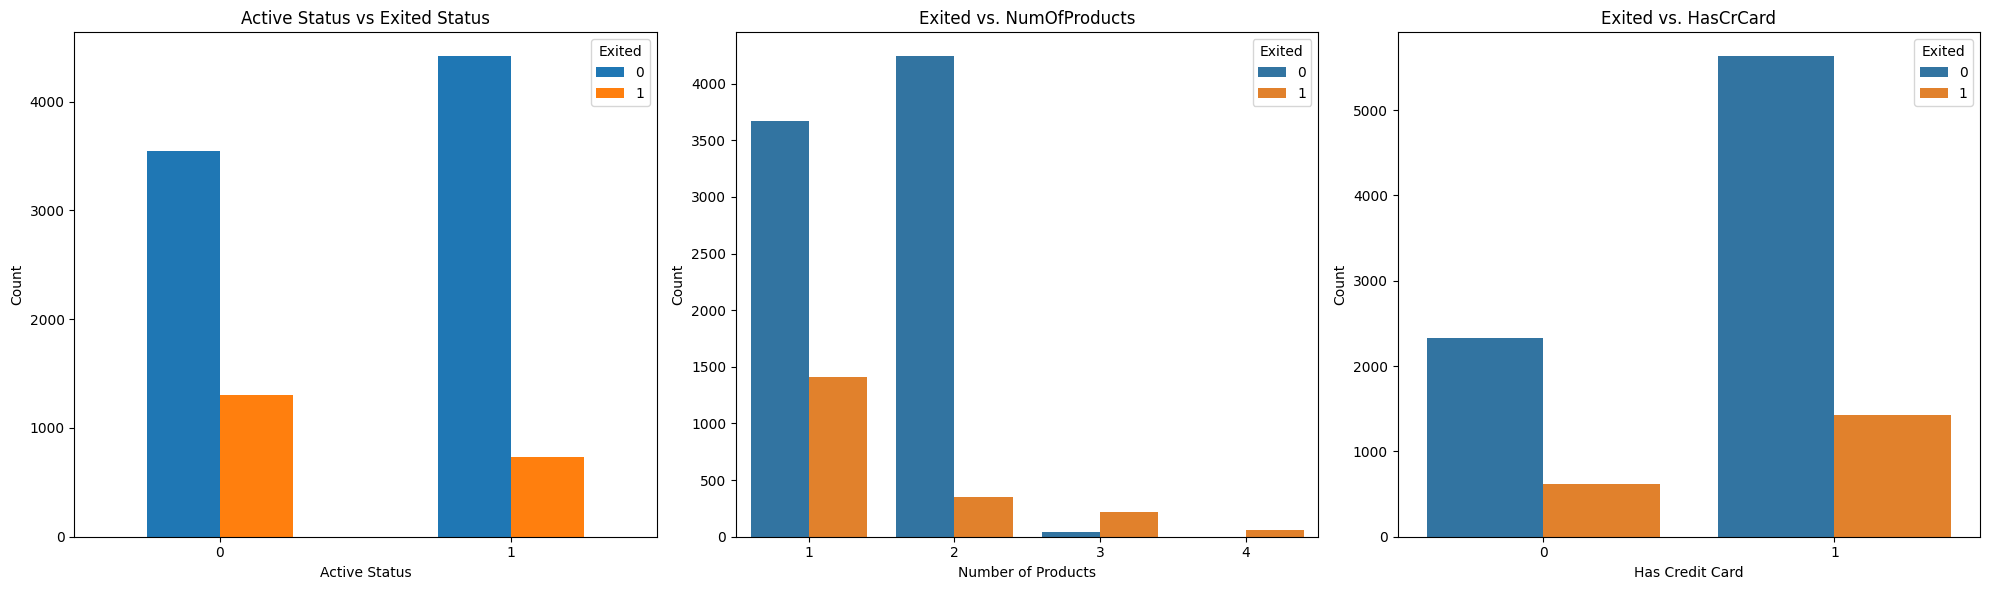

In [19]:
# Set the overall figure size for the row of plots
plt.figure(figsize=(20, 6))

# Plot 1: Active Status vs Exited Status
plt.subplot(1, 3, 1)  # Create the first subplot in a 1x3 grid
active_exited = pd.crosstab(df['IsActiveMember'], df['Exited'])  # Cross-tabulate Active Member status with Exited status
active_exited.plot(kind='bar', ax=plt.gca())  # Plot a bar chart using the crosstab data
plt.title('Active Status vs Exited Status')
plt.xlabel('Active Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Set x-axis labels to horizontal

# Plot 2: Exited vs. NumOfProducts
plt.subplot(1, 3, 2)  # Create the second subplot in the 1x3 grid
sns.countplot(data=df, x='NumOfProducts', hue='Exited')  # Plot count of NumOfProducts with Exited status as the hue
plt.title('Exited vs. NumOfProducts')
plt.xlabel('Number of Products')
plt.ylabel('Count')

# Plot 3: Exited vs. HasCrCard
plt.subplot(1, 3, 3)  # Create the third subplot in the 1x3 grid
sns.countplot(data=df, x='HasCrCard', hue='Exited')  # Plot count of HasCrCard with Exited status as the hue
plt.title('Exited vs. HasCrCard')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

# Adjust layout to avoid overlapping elements and display the plots
plt.tight_layout()
plt.show()


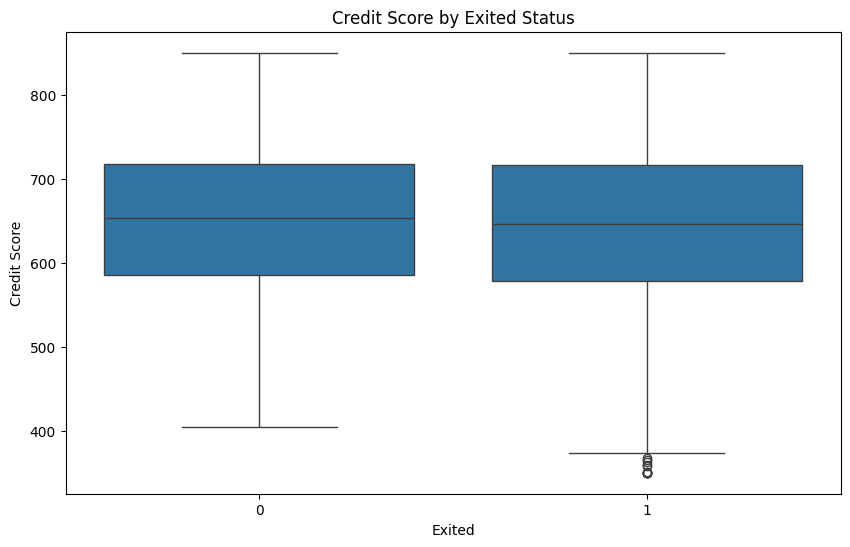

In [20]:
# Set the figure size for the boxplot
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of CreditScore by Exited status
sns.boxplot(x='Exited', y='CreditScore', data=df)

# Add title and axis labels
plt.title('Credit Score by Exited Status')
plt.xlabel('Exited')
plt.ylabel('Credit Score')

# Display the plot
plt.show()


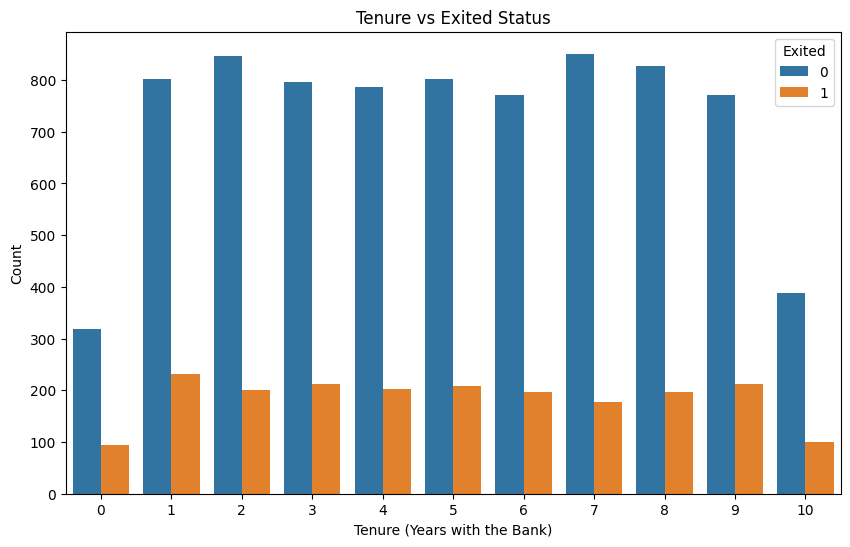

In [21]:
# Set the figure size for the count plot
plt.figure(figsize=(10, 6))

# Create a count plot to show the distribution of Tenure by Exited status
sns.countplot(data=df, x='Tenure', hue='Exited')

# Add title and axis labels
plt.title('Tenure vs Exited Status')
plt.xlabel('Tenure (Years with the Bank)')
plt.ylabel('Count')

# Display the plot
plt.show()


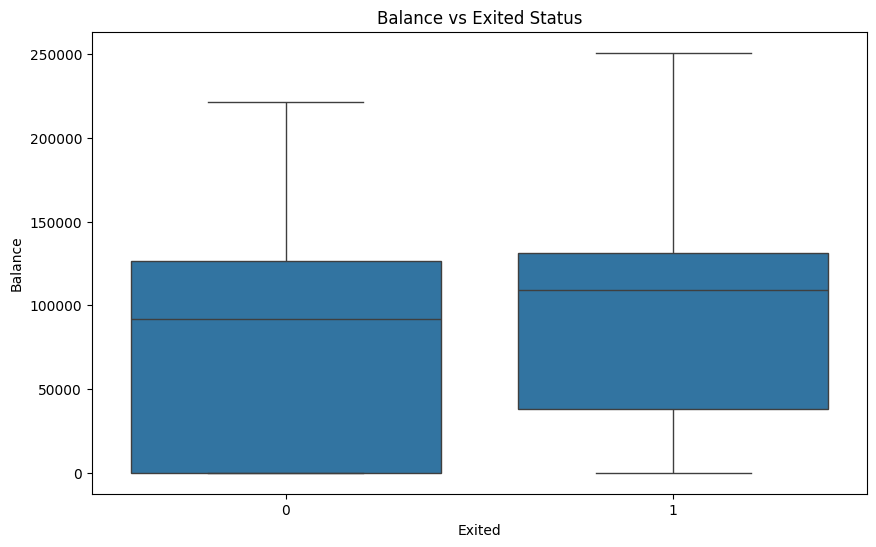

In [22]:
# Set the figure size for the box plot
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of Balance by Exited status
sns.boxplot(data=df, x='Exited', y='Balance')

# Add title and axis labels
plt.title('Balance vs Exited Status')
plt.xlabel('Exited')
plt.ylabel('Balance')

# Display the plot
plt.show()


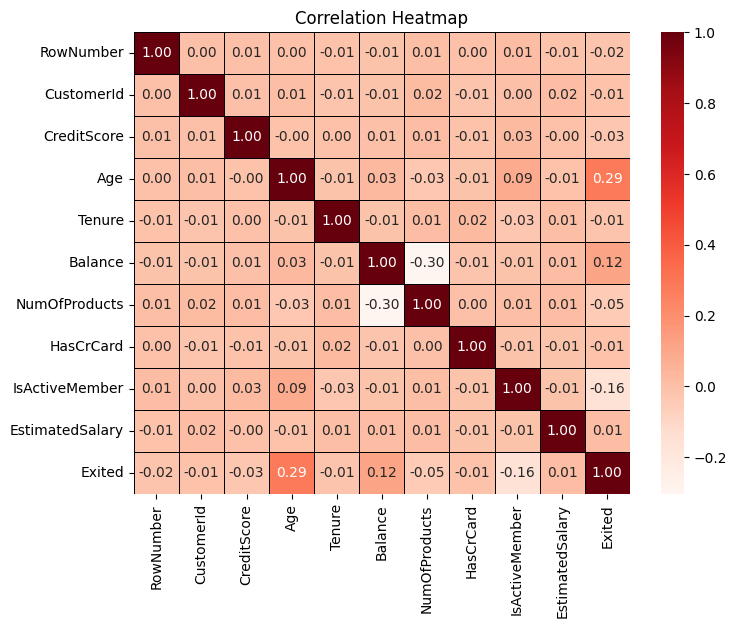

In [23]:
# Calculate correlation matrix
# Select only numeric columns for correlation
corr_matrix = df.select_dtypes(include=np.number).corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,cmap='Reds', linecolor='black',fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# **IV. Customer Segmentation - KMeans Clustering**

## **1. Data Preparation**

### **Feature Selection**

In [24]:
from sklearn.preprocessing import StandardScaler

# Select the relevant features for clustering
features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts','EstimatedSalary'
]

# Subset the data to include only the relevant features
data_subset = df[features]

### **Scaling data**

In [25]:
# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_subset), columns=features)

# Display the first few rows of the preprocessed data
data_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


## **2. Elbow Method**

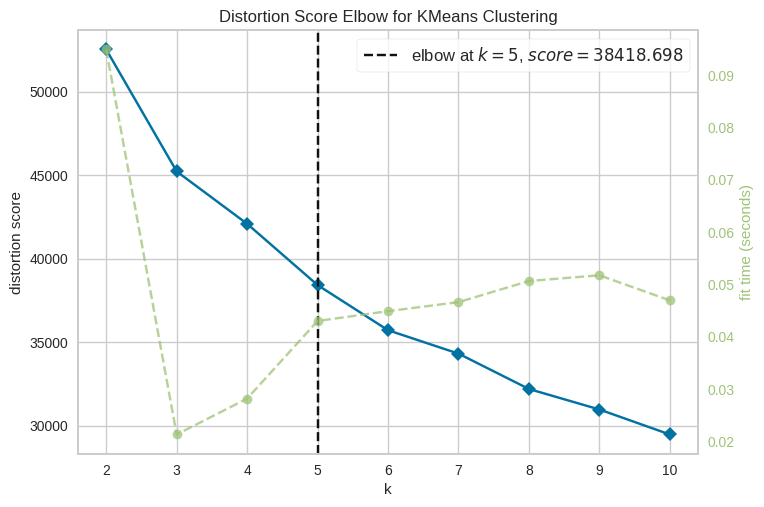

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans clustering model with a random state for reproducibility
kmeans = KMeans(random_state=42)

# Set up the ElbowVisualizer with the KMeans model to find the optimal number of clusters
# The 'metric' is set to 'distortion', which measures the sum of squared distances from each point to its assigned cluster center
Elbow_M = KElbowVisualizer(kmeans, k=10, metric='distortion')

# Fit the ElbowVisualizer on the scaled data to evaluate different values of k (number of clusters)
Elbow_M.fit(data_scaled)

# Display the elbow plot, which helps identify the "elbow" point where adding more clusters does not significantly reduce distortion
Elbow_M.show()



## **3. Apply K-means Clustering**

In [27]:
k = 5  # optimal K
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels for each customer
data_scaled['Cluster'] = kmeans.labels_

# View the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(cluster_centers)


   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary
0    -0.026406 -0.274826  0.026649  0.692548      -0.482456         0.947179
1    -0.121735 -0.291793  0.933355 -0.947069       0.647431        -0.027205
2    -0.005506  1.959245 -0.051709  0.025330      -0.266838        -0.068174
3     0.099636 -0.235817 -0.900079 -0.847787       0.756598         0.019885
4     0.046599 -0.257617 -0.028622  0.722666      -0.504487        -0.904435


<ipython-input-28-16a499d40fb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Cluster', data=df_cluster,  palette="Pastel1")


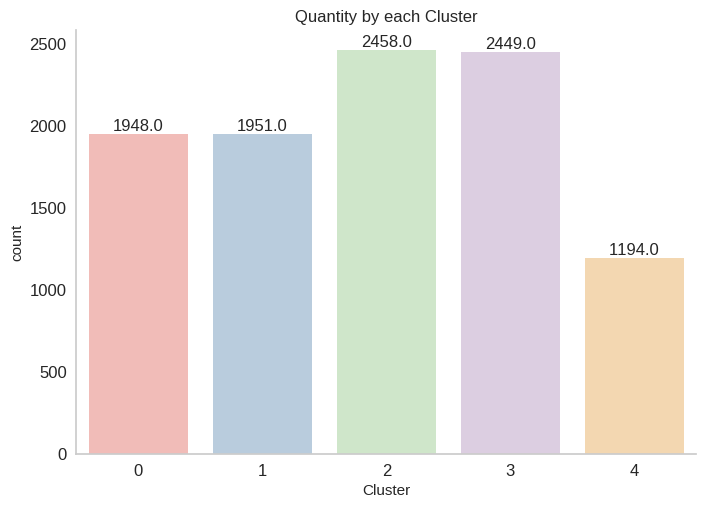

In [28]:
df_cluster = df.copy()

df_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

ax = sns.countplot(x='Cluster', data=df_cluster,  palette="Pastel1")

# Access the patches
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    value = patch.get_height()
    text = f'{value}'  # Format the value as desired
    ax.text(x, y, text, ha='center', va='bottom')
ax.set_title('Quantity by each Cluster', size = 12)
ax.tick_params(labelsize = 12)
# Remove gridlines
sns.despine()  # Remove top and right spines
plt.grid(False)  # Remove gridlines

plt.show()

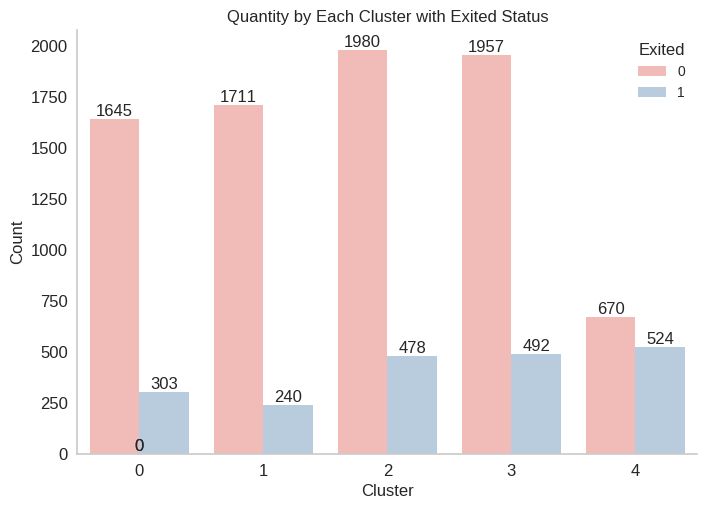

In [29]:
# Copy the dataframe
df_cluster = df.copy()

# Add Cluster labels to the dataframe
df_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

# Plot the count of each cluster with hue set to 'Exited'
ax = sns.countplot(x='Cluster', hue='Exited', data=df_cluster, palette="Pastel1")

# Access the patches to add annotations
for patch in ax.patches:
    # Calculate the center and height of each bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    value = int(patch.get_height())
    text = f'{value}'

    # Annotate each bar with the count value
    ax.text(x, y, text, ha='center', va='bottom')

# Set title and adjust aesthetics
ax.set_title('Quantity by Each Cluster with Exited Status', size=12)
ax.set_xlabel('Cluster', size=12)
ax.set_ylabel('Count', size=12)
ax.tick_params(labelsize=12)
sns.despine()  # Remove top and right spines
plt.grid(False)  # Remove gridlines

plt.legend(title='Exited', loc='upper right')
plt.show()


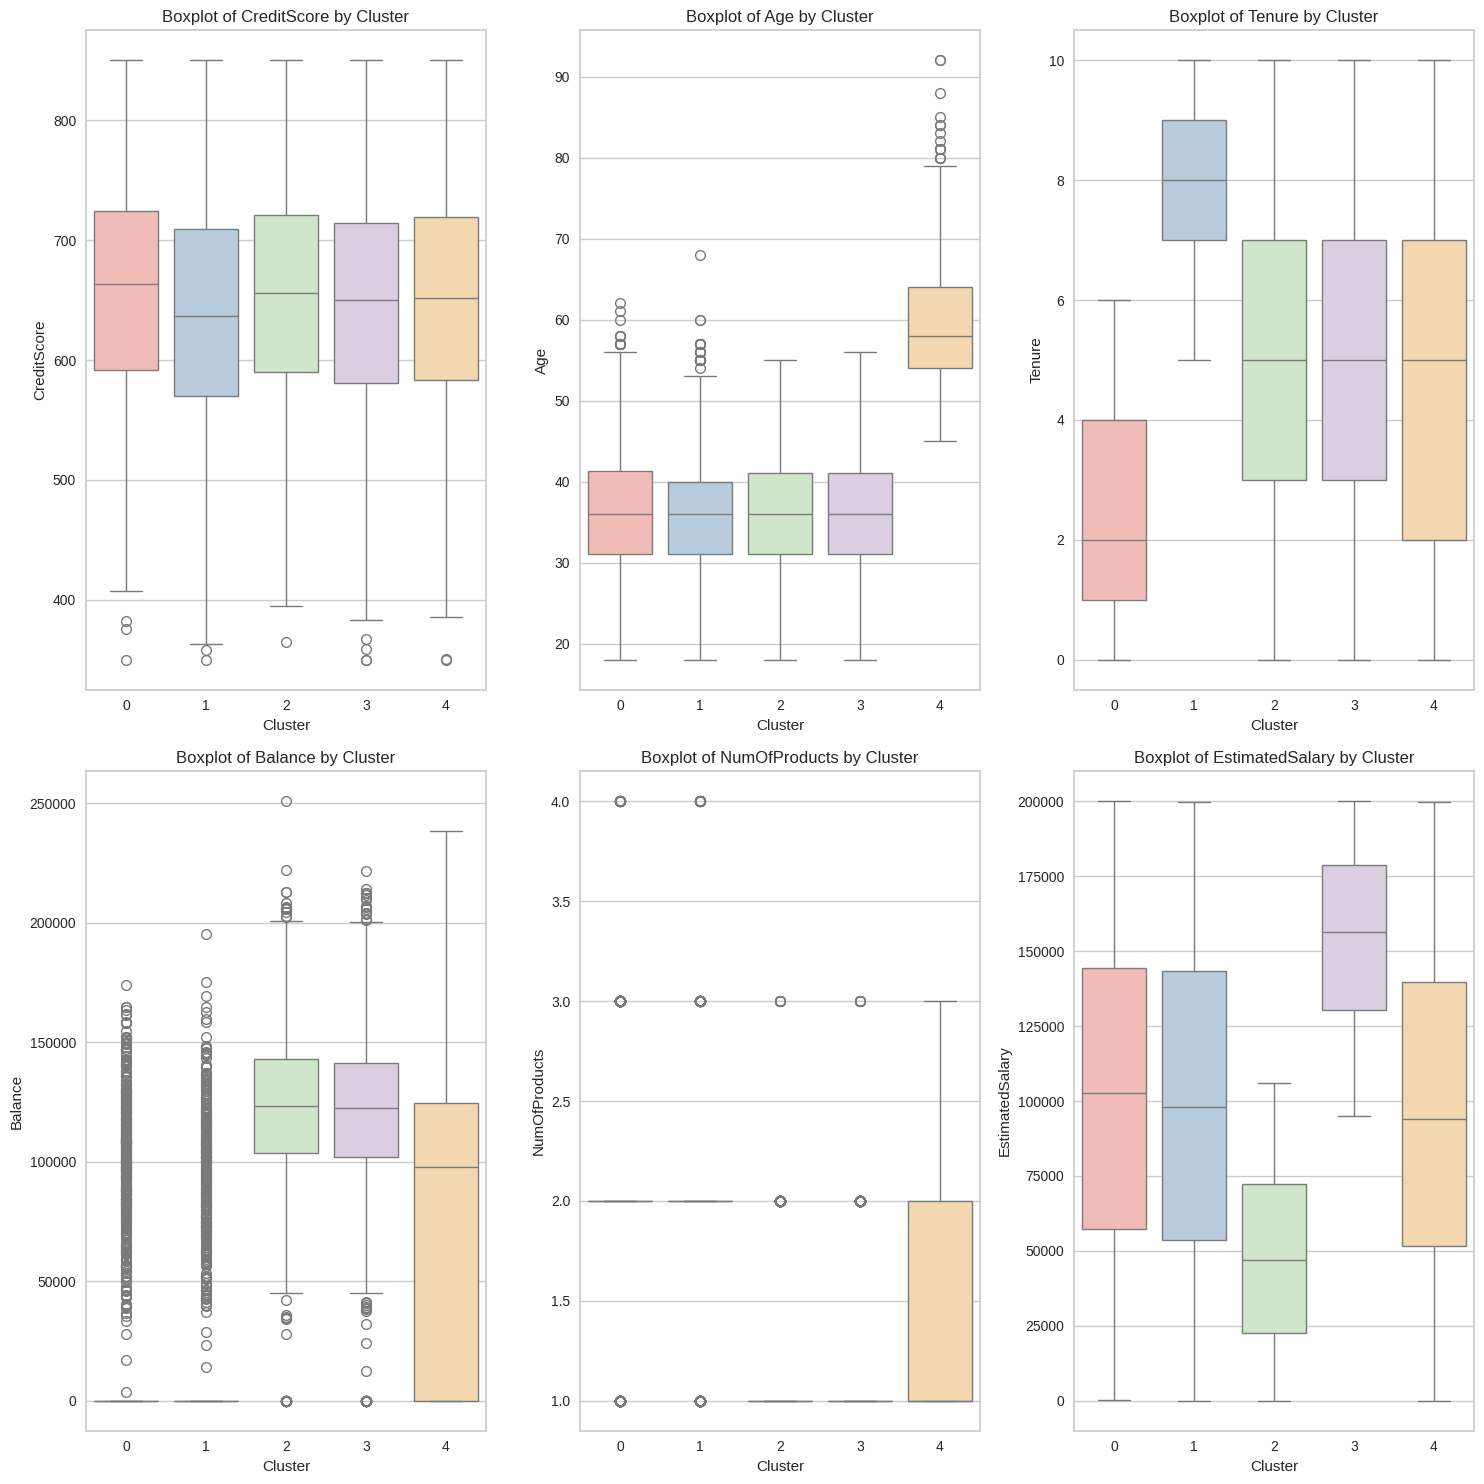

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of features
num_features = len(features)

# Create subplots with a grid layout (you can adjust rows and columns as needed)
fig, axes = plt.subplots(nrows=(num_features // 3) + (num_features % 3 > 0), ncols=3, figsize=(15, num_features * 2.5))

# Flatten the axes array for easier iteration if there are more features than axes
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df_cluster, hue = 'Cluster', legend = False, palette="Pastel1", ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Cluster')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


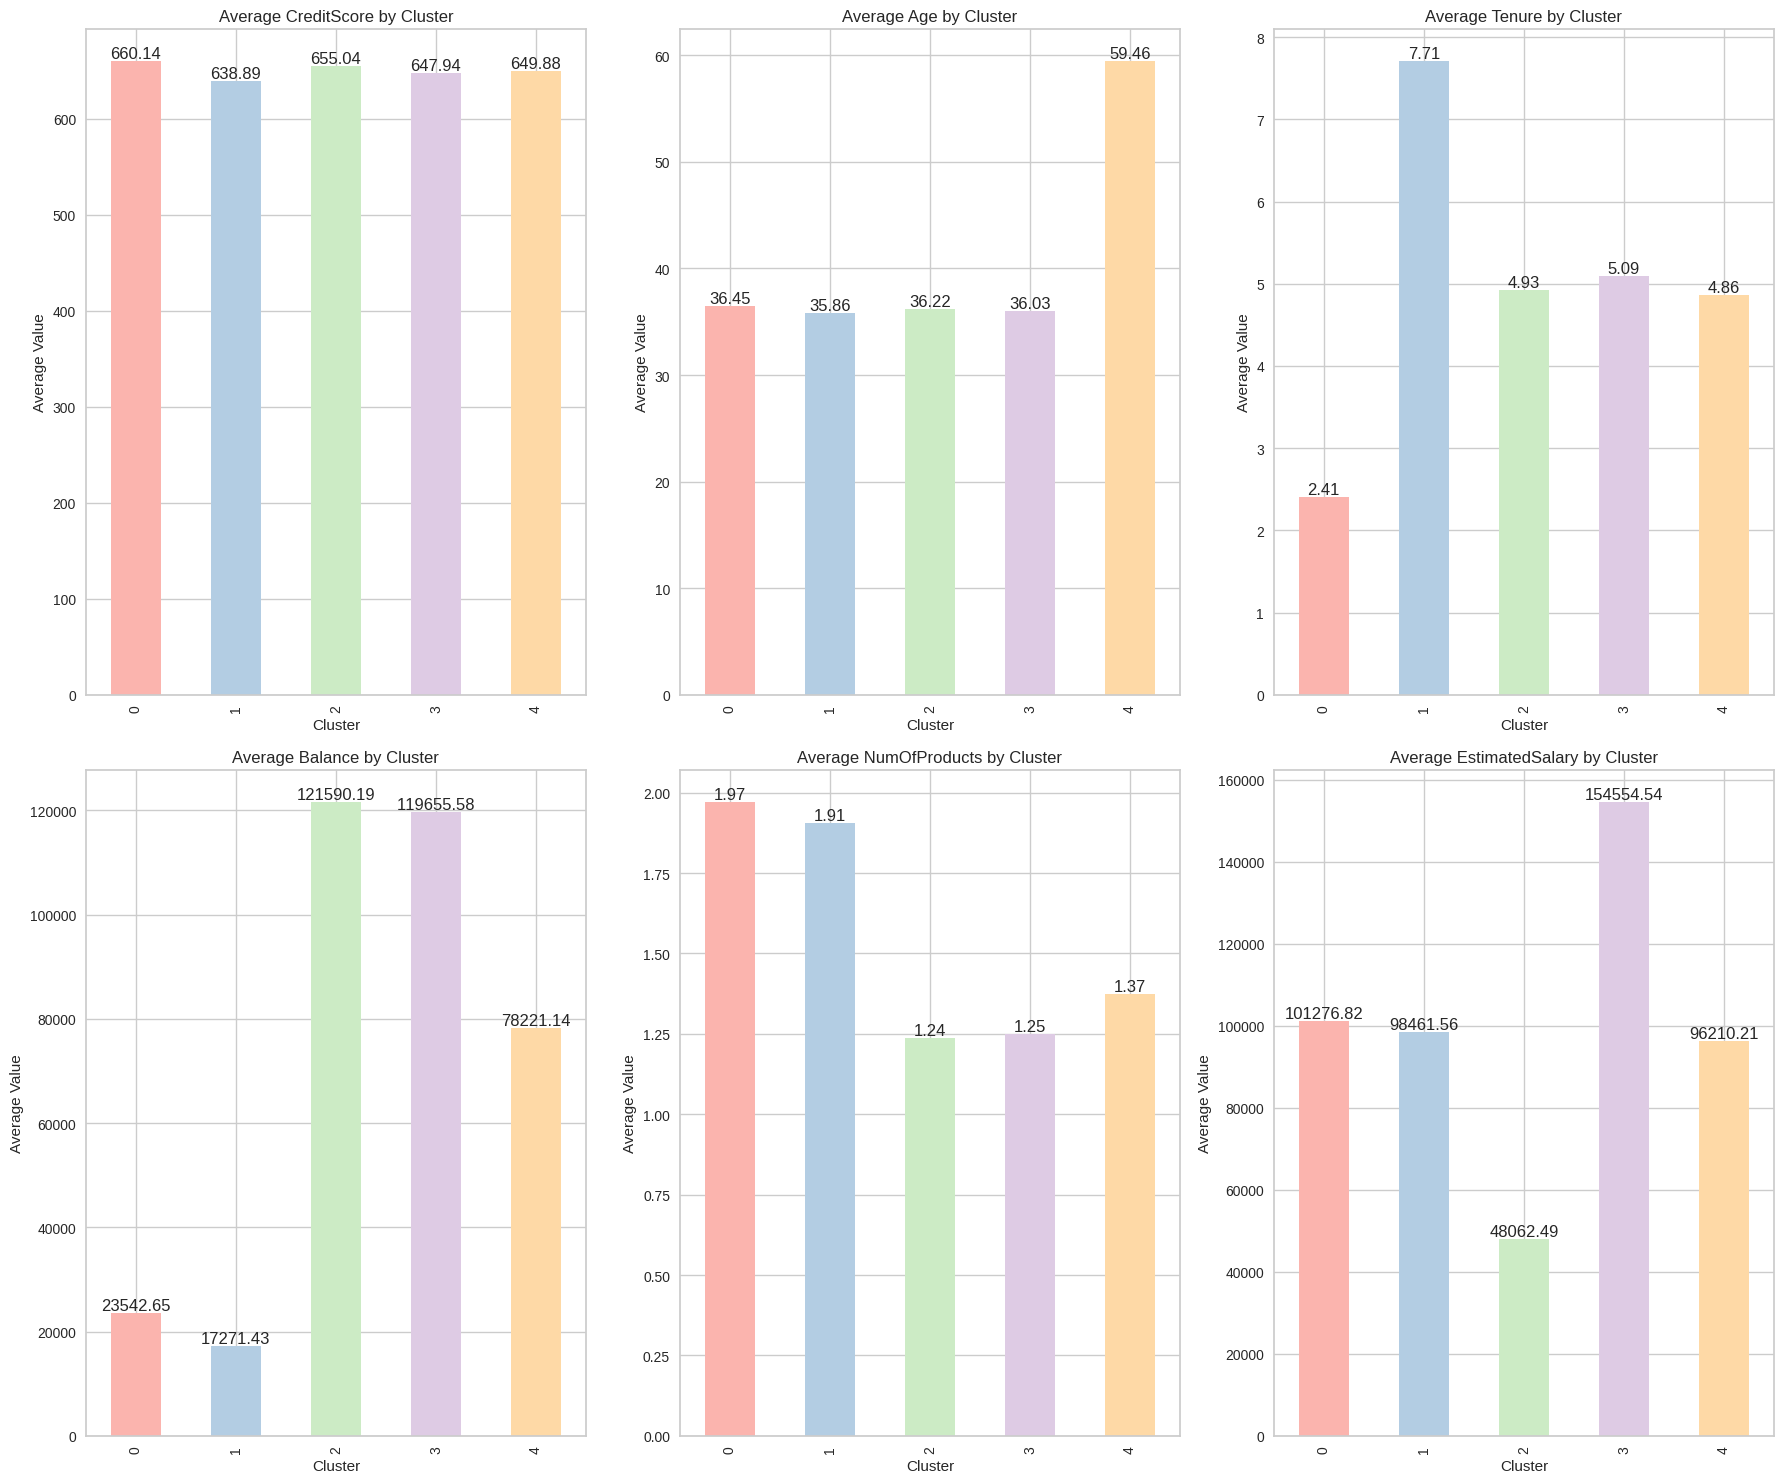

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pastel colors from the "Pastel1" palette
colors = sns.color_palette("Pastel1", len(df_cluster['Cluster'].unique()))

# Determine the number of features
num_features = len(features)

# Create subplots with a grid layout (adjust rows and columns as needed)
fig, axes = plt.subplots(nrows=(num_features // 3) + (num_features % 3 > 0), ncols=3, figsize=(18, num_features * 2.5))

# Flatten the axes array for easier iteration if there are more features than axes
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(features):
    # Calculate the mean values by cluster
    cluster_means = df_cluster.groupby('Cluster')[feature].mean()

    # Create the bar plot on the corresponding subplot axis with the pastel colors
    ax = cluster_means.plot(kind='bar', ax=axes[i], color=colors)
    ax.set_title(f'Average {feature} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Value')

    # Add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')  # Format labels to 2 decimal places

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# **V. Machine Learning**

## **1. Data Preprocessing**

### Feature Selection

In [53]:
# Remove unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Encoding

After conducting Exploratory Data Analysis (EDA), we observed that the **Geography** and **Gender** columns in the dataset are currently in string format. Therefore, we will convert them into numerical format to prepare for Machine Learning.








In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder instance
encoder = LabelEncoder()

# List of columns to encode
col = ['Geography', 'Gender']

# Loop through each column in the list
for i in col:
    # Transform categorical labels to numerical values and update the DataFrame
    df[i] = encoder.fit_transform(df[i])

    # Print the mapping of original labels to encoded values for each column
    print(f"Mapping for {i}:")
    for idx, label in enumerate(encoder.classes_):
        print(f"{label} -> {idx}")
    print("\n")


Mapping for Geography:
France -> 0
Germany -> 1
Spain -> 2


Mapping for Gender:
Female -> 0
Male -> 1




### Imbalance data

In [55]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


The data shown indicates an imbalance, with 7,963 instances of "Exited = 0" and 2,037 instances of "Exited = 1."

We will handle this using **OVERSAMPLING** method.




In [56]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# Split data into training and testing sets before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after oversampling
unique, counts = np.unique(y_train_SMOTE, return_counts=True)

print("Target distribution after SMOTE:", dict(zip(unique, counts)))


Target distribution after SMOTE: {0: 6356, 1: 6356}


### Scaling data

We need to scale data to ensure that features are on a similar scale, which improves model performance and training stability

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train_SMOTE)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back into DataFrames with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the head of the scaled training DataFrame
print("Scaled training data:")
print(X_train_scaled.head())

Scaled training data:
   CreditScore  Geography    Gender       Age    Tenure   Balance  \
0     0.401936  -0.895495  1.187759 -0.887212  0.443919 -1.320989   
1    -0.189545   0.426174  1.187759  0.109777 -0.289618  0.622903   
2    -0.989140   1.747842  1.187759 -1.684804 -0.656387  0.543528   
3    -0.967233  -0.895495 -0.841922 -1.385707  1.544225  0.883104   
4    -1.449181  -0.895495  1.187759  1.505562  1.544225  0.988896   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       1.002561   0.777069        1.310053         1.355801  
1       1.002561   0.777069        1.310053         1.649781  
2      -0.738261   0.777069       -0.763328        -0.266858  
3      -0.738261   0.777069       -0.763328         0.902915  
4      -0.738261  -1.286888       -0.763328        -1.074738  


## **2. Building Models**

After preprocessing the data, we proceed to build machine learning models. In this project, I will develop **18 machine learning models**. Then, I will select the **top 3 models** and perform **hyperparameter tuning** to find the most suitable model for my problem.
1. Logistic Regression
2. K-Nearest Neighbors
3. Linear SVM
4. Gradient Boosting Classifier
5. Decision Tree
6. Random Forest
7. Naive Bayes (Gaussian)
8. Naive Bayes (Bernoulli)
9. AdaBoost Classifier
10. Bagging Classifier
11. Extra Trees Classifier
12. Ridge Classifier
13. Passive Aggressive Classifier
14. Perceptron
15. Linear Discriminant Analysis
16. Quadratic Discriminant Analysis
17. XGBoost Classifier
18. LightGBM Classifier

In [37]:
import time

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Classification Models

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "AdaBoost Classifier": AdaBoostClassifier(algorithm="SAMME"),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost Classifier": XGBClassifier(),
    "LightGBM Classifier": LGBMClassifier(verbose=-1)
}


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [38]:
# Determine the number of classifiers in the dictionary of classifiers
no_classifiers = len(dict_classifiers.keys())

# Define a function to train multiple classifiers, record training time, and calculate training/test accuracy
def batch_classify(X_train, Y_train, X_test, Y_test, verbose=True):
    # Initialize a DataFrame to store results with columns for classifier name, train score, test score, and training time
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 4)),
                              columns=['classifier', 'train_score', 'test_score', 'training_time'])
    count = 0  # Counter for indexing the DataFrame rows

    # Loop through each classifier in the dictionary
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)

        # Store the classifier name, training score, test score, and training time in the results DataFrame
        df_results.loc[count, 'classifier'] = key
        df_results.loc[count, 'train_score'] = train_score
        df_results.loc[count, 'test_score'] = test_score
        df_results.loc[count, 'training_time'] = t_diff

        # If verbose is True, print the training time for the current classifier
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))

        # Increment the counter for the next classifier
        count += 1

    # Return the DataFrame containing the results for each classifier
    return df_results


In [58]:
# Rename variables for convenience
X_train = X_train_scaled
y_train = y_train_SMOTE
X_test = X_test_scaled
y_test = y_test

# Train models using the batch_classify function with the prepared training data
df_results = batch_classify(X_train, y_train, X_test, y_test, verbose=True)

# Display the results, sorted by training score in descending order
print(df_results.sort_values(by='train_score', ascending=False))


<ipython-input-38-9707dfd28e2b>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Logistic Regression' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_results.loc[count,'classifier'] = key


trained Logistic Regression in 0.05 s
trained Nearest Neighbors in 0.07 s
trained Linear SVM in 4.57 s
trained Gradient Boosting Classifier in 2.60 s
trained Decision Tree in 0.09 s
trained Random Forest in 2.66 s
trained Naive Bayes (Gaussian) in 0.01 s
trained Naive Bayes (Bernoulli) in 0.01 s
trained AdaBoost Classifier in 0.79 s
trained Bagging Classifier in 0.63 s
trained Extra Trees Classifier in 1.40 s
trained Ridge Classifier in 0.03 s
trained Passive Aggressive Classifier in 0.06 s
trained Perceptron in 0.04 s
trained Linear Discriminant Analysis in 0.23 s
trained Quadratic Discriminant Analysis in 0.05 s
trained XGBoost Classifier in 0.79 s
trained LightGBM Classifier in 0.32 s
                         classifier  train_score  test_score  training_time
10           Extra Trees Classifier     1.000000      0.8075       1.398953
4                     Decision Tree     1.000000      0.7585       0.091404
5                     Random Forest     0.999921      0.8185       2.663534

In [59]:
## Cross-validation
# Use cross-validation to address overfitting.
# Each algorithm is trained 10 times on the TRAIN set using Cross-Validation.

from sklearn.model_selection import cross_val_score

# Initialize a list to store results
results = []

# Loop through each model and perform Cross-Validation
for name, clf in dict_classifiers.items():
    # Perform cross-validation with 10 folds and store the scores
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    # Append results for each model, including the mean score and standard deviation
    results.append({
        'Classifier': name,
        'Crossval Mean Score': scores.mean(),  # Average cross-validation score
        'Crossval Std Dev': scores.std()       # Standard deviation to assess model stability
    })

# Create a DataFrame from the results
result_df = pd.DataFrame(results)

# Sort results by the mean cross-validation score in descending order
result_df.sort_values(by='Crossval Mean Score', ascending=False, inplace=True)

# Print the final sorted results
print(result_df)


                         Classifier  Crossval Mean Score  Crossval Std Dev
10           Extra Trees Classifier             0.861720          0.053915
16               XGBoost Classifier             0.860854          0.050198
5                     Random Forest             0.860460          0.048558
17              LightGBM Classifier             0.853772          0.045112
9                Bagging Classifier             0.841974          0.049883
3      Gradient Boosting Classifier             0.834892          0.043552
2                        Linear SVM             0.832141          0.049531
1                 Nearest Neighbors             0.824116          0.045219
8               AdaBoost Classifier             0.813021          0.040215
15  Quadratic Discriminant Analysis             0.800757          0.063534
4                     Decision Tree             0.796738          0.038200
6            Naive Bayes (Gaussian)             0.793286          0.069902
7           Naive Bayes (

## **3. Hyperparameters Tunning and Choose the best model**

Top 3 models: **Extra Trees Classifier**, **XGBoost Classifier** and **Random Forest**

Now, I wil perform tuning hyperparameters

### Hyperparameters Tunning

In [60]:
# Parameter grid for Extra Trees Classifier
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Parameter grid for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Parameter grid for Random Forest Classifier (already provided but included here for reference)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
from sklearn.model_selection import GridSearchCV

# Extra Trees Classifier
et = ExtraTreesClassifier(random_state=42)
grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid_et, cv=5, scoring='recall')
grid_search_et.fit(X_train, y_train)

# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='recall')
grid_search_xgb.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

### Choose the best model

In [67]:
from sklearn.metrics import recall_score

### Display best parameters and recall scores

# Best parameters and recall for Extra Trees Classifier
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Extra Trees recall:", recall_score(y_test, grid_search_et.predict(X_test)))

print("")

# Best parameters and recall for XGBoost Classifier
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("XGBoost recall:", recall_score(y_test, grid_search_xgb.predict(X_test)))
print("")

# Best parameters and recall for Random Forest Classifier
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Random Forest recall:", recall_score(y_test, grid_search_rf.predict(X_test)))


Best parameters for Extra Trees: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Extra Trees recall: 0.6310432569974554

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
XGBoost recall: 0.628498727735369

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest recall: 0.6615776081424937


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# Initialize an empty list to store the results
results = []

# Extra Trees Classifier
extra_trees_metrics = {
    'Classifier': 'Extra Trees',
    'Accuracy': accuracy_score(y_test, grid_search_et.predict(X_test)),
    'Precision': precision_score(y_test, grid_search_et.predict(X_test)),
    'Recall': recall_score(y_test, grid_search_et.predict(X_test)),
    'F1 Score': f1_score(y_test, grid_search_et.predict(X_test))
}
results.append(extra_trees_metrics)

# XGBoost Classifier
xgboost_metrics = {
    'Classifier': 'XGBoost',
    'Accuracy': accuracy_score(y_test, grid_search_xgb.predict(X_test)),
    'Precision': precision_score(y_test, grid_search_xgb.predict(X_test)),
    'Recall': recall_score(y_test, grid_search_xgb.predict(X_test)),
    'F1 Score': f1_score(y_test, grid_search_xgb.predict(X_test))
}
results.append(xgboost_metrics)

# Random Forest Classifier
random_forest_metrics = {
    'Classifier': 'Random Forest',
    'Accuracy': accuracy_score(y_test, grid_search_rf.predict(X_test)),
    'Precision': precision_score(y_test, grid_search_rf.predict(X_test)),
    'Recall': recall_score(y_test, grid_search_rf.predict(X_test)),
    'F1 Score': f1_score(y_test, grid_search_rf.predict(X_test))
}
results.append(random_forest_metrics)

# Create a DataFrame to display all results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


      Classifier  Accuracy  Precision    Recall  F1 Score
0    Extra Trees    0.8080   0.509240  0.631043  0.563636
1        XGBoost    0.8245   0.546460  0.628499  0.584615
2  Random Forest    0.8205   0.534979  0.661578  0.591581


## **4. Evaluation**

In [73]:
# Apply model

rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state= 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


### Confusion matrix

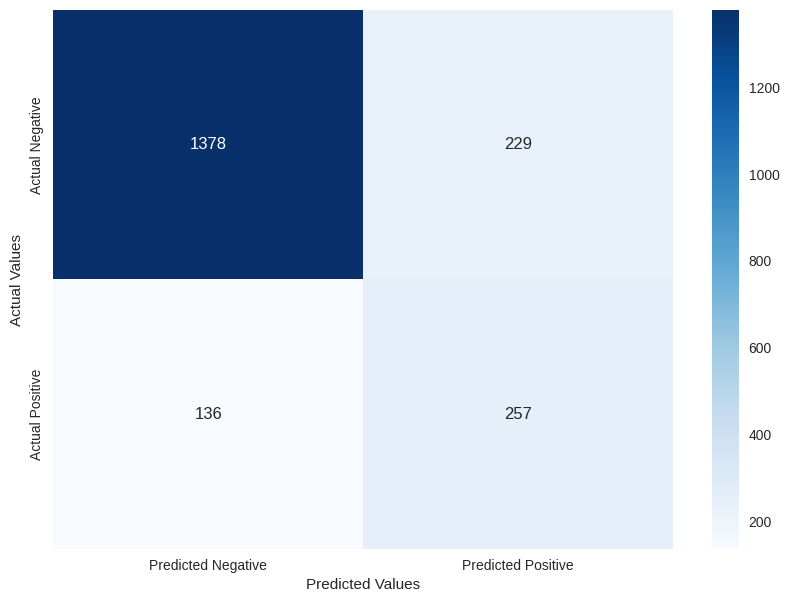

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Accuracy, Precision, Recall, F1_score

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # precision = tp / tp +fp
recall = recall_score(y_test, y_pred) # recall = tp / tp + fn
f1 = f1_score(y_test, y_pred) # f1 = 2 *precision*recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8205
Precision: 0.5349794238683128
Recall: 0.6615776081424937
F1 Score: 0.5915813424345847


### AUPRC

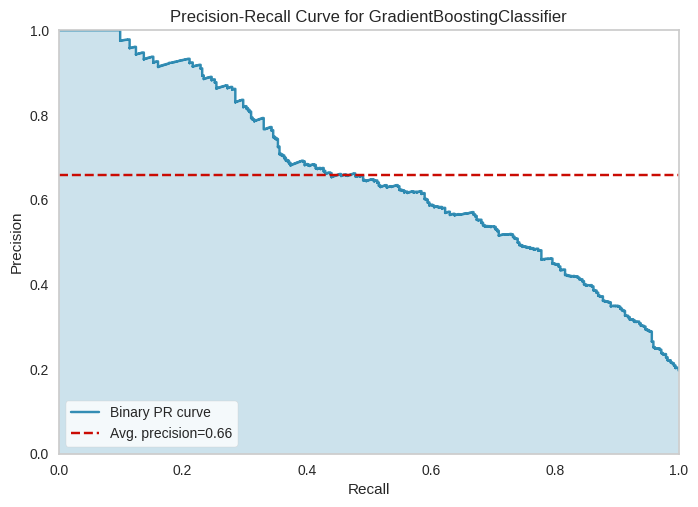

<Axes: title={'center': 'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [75]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(GradientBoostingClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

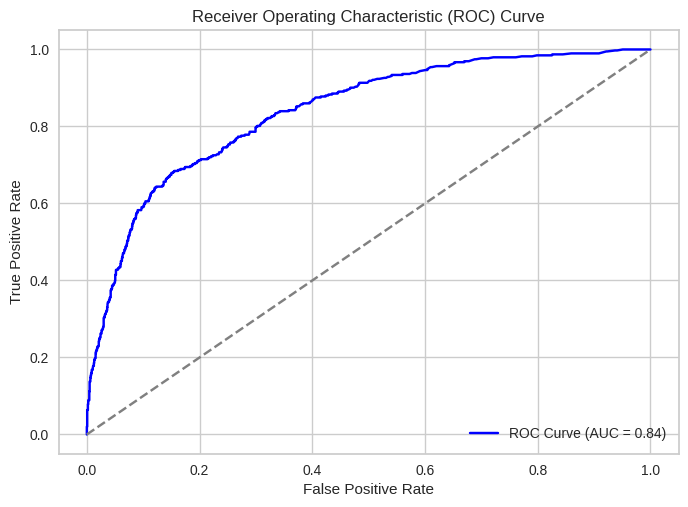

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


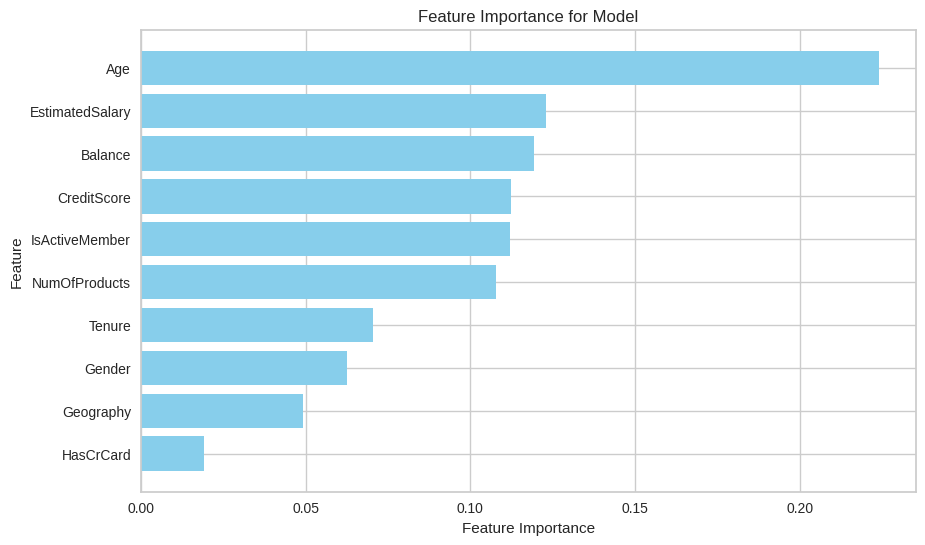

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf.feature_importances_

# Get feature names (assuming your features are in a DataFrame called X_train)
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
